 # Geodesicas en la métrica de Kerr

In [75]:
using Plots

In [76]:
#declaracion de las constantes

M=0.1 #masa del BH
a=0.9*M #momento angular
R=2*M #radii 
l=0.5
e=0.9
h=0.01

r0 = 1*M;  
phi0 = pi/4
u0=-0.06
ti=0
tf=1000 #número de iteraciones
N=Int64(floor((tf-ti)/h))
mod=5;

In [77]:
exp(-3.5)

0.0301973834223185

In [78]:
function Δ(r)
    return (r^2)-2*M*r+a^2
end

Δ (generic function with 1 method)

In [79]:
function dt(r)
    return (1/Δ(r))*((r^2+a^2+(2*M*a^2/r))e-(2*M*a/r)*l)
end

dt (generic function with 1 method)

In [80]:
function f0(r,phi)
   return (1/Δ(r))*((1-(2*M/r))l+(2*M*a/r)*e)
  # return (l/r^2)
end

f0 (generic function with 1 method)

In [89]:
function X(r)
    return -((r^4)*(r*(a-M*r)))/(r^6)*(a^2+r*(r-2*M))
end
function Y(r)
    return -(M*(a^2+r*(r-2*M)))*dt(r)*r^-4
end
function Z(r)
    return  (r^-4)*(2*a*M*(r-2*M*r))*dt(r)*f0(r,0)
end
function G(r)
    return (a^2+r*(r-2*M*r))*(r^5-a^2*M*r^2)*r^-6
end

G (generic function with 1 method)

In [90]:
function f1(r,phi,u)
    return u
end

f1 (generic function with 1 method)

In [91]:
function f2(r,phi,u)
return  X(r)+Y(r)+Z(r)+G(r)
#   return ((l^2)/(r^3))-(M/r^2)
    #return (l^2)/(r^4)-(2*M*(l^2))/(r^5)-(e*M)/((r^2)-2*M*r)
end

f2 (generic function with 1 method)

In [92]:
function RK4(r_0, phi_0, u_0,Nt)
    
    x=zeros((Nt/mod)+1)
    y=zeros((Nt/mod)+1)
    x[1]=r_0*cos(phi_0)
    y[1]=r_0*sin(phi_0)
    j=1
    
    count=0
    
    for i in 1:Nt
        

        k1 = h*f1(r_0, phi_0,u_0)
        l1 = h*f2(r_0, phi_0,u_0)
        m1 = h*f0(r_0,phi_0)    

        k2 = h*f1(r_0+0.5*h, phi_0+0.5*k1,u_0+0.5*l1)
        l2 = h*f2(r_0+0.5*h, phi_0+0.5*k1,u_0+0.5*l1)
        m2 = h*f0(r_0+0.5*h, phi_0+0.5*m1)

        k3 = h*f1(r_0+0.5*h, phi_0+0.5*k2, u_0+0.5*l2)
        l3 = h*f2(r_0+0.5*h, phi_0+0.5*k2, u_0+0.5*l2)
        m3 = h*f0(r_0+0.5*h, phi_0+0.5*m2)

        k4 = h*f1(r_0+0.5*h, phi_0+k3, u_0+l3)
        l4 = h*f2(r_0+0.5*h, phi_0+k3, u_0+l3)
        m4 = h*f0(r_0+0.5*h, phi_0+m3)

        r_new = r_0 + (1/6)*(k1 + 2.0*k2 + 2.0*k3 + k4)
        u_new = u_0 + (1/6)*(l1 + 2.0*l2 + 2.0*l3 + l4)
        phi_new=phi_0+(1/6)*(m1 + 2.0*m2 + 2.0*m3 + m4)

        
        r_0=r_new
        phi_0=phi_new
        u_0=u_new    
    
        if(count % mod==0) 
            
            x[j+1]=r_new*cos(phi_new)
            y[j+1]=r_new*sin(phi_new)
            j=j+1
        end
       
    count=count+1 
    end   
    return x,y
    
end

RK4 (generic function with 1 method)

In [93]:
xx,yy=RK4(r0,phi0,u0,N)

([0.0707107, -2.48609, -25.2736, -48.3084, -72.1677, -97.8258, -126.755, -161.14, -204.294, -261.477  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.0707107, 2.24659, 22.814, 43.6059, 65.1421, 88.3019, 114.415, 145.451, 184.404, 236.02  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN])

In [97]:
xx


20001-element Array{Float64,1}:
    0.0707107
   -2.48609  
  -25.2736   
  -48.3084   
  -72.1677   
  -97.8258   
 -126.755    
 -161.14     
 -204.294    
 -261.477    
 -341.549    
 -460.549    
 -650.231    
    ⋮        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        
  NaN        

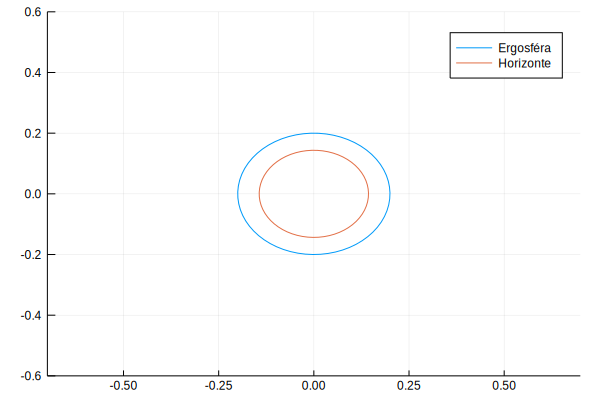

In [95]:

tt=[]
ttt=[]
kk=[]
kkk=[]
for i in 1:100
    push!(tt,2*M*cos(0.1*i))
    push!(ttt,2*M*sin(0.1*i)) 
    push!(kk,(M+sqrt((M^2)-(a^2)))*cos(0.1*i))
    push!(kkk,(M+sqrt((M^2)-(a^2)))*sin(0.1*i)) 
    end

plot(tt,ttt,label="Ergosféra",ylim=(-6*M,6*M),xlim=(-7*M,7*M))
plot!(kk,kkk,label="Horizonte")

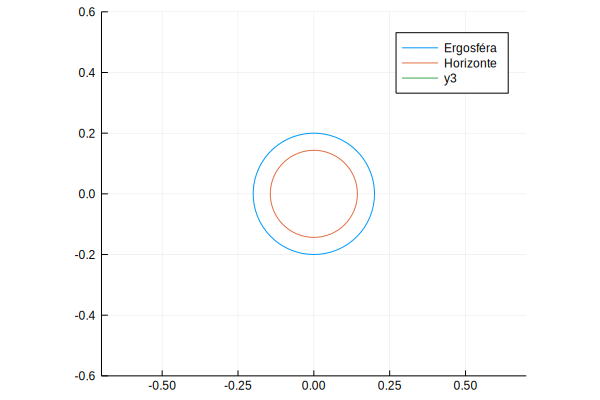

In [96]:
plot!(xx,yy,aspect_ratio=1)

## 